# 2023 - 2024 NHL Player stats

Reviewing NHL data for each hockey player. The current rank in the listing is based on points. #1 rank has the highest points for the season. The goal of this project is to continue to learn about Linear Regression and see if we can build a model showing correcation between Points and some features.

In [2]:
# Importing libararies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [38]:
pd.options.display.max_columns = 30

## Exploring the dataset

Putting dataset into a data frame and cleaning up the column that will not be needed

In [3]:
raw_df = pd.read_excel("23-24 NHL Player stats.xlsx")

In [5]:
raw_df.columns

Index([    'Rk', 'Player',    'Age',   'Team',    'Pos',     'GP',      'G',
            'A',    'PTS',    '+/-',    'PIM',    'EVG',    'PPG',    'SHG',
          'GWG',     'EV',     'PP',     'SH',    'SOG',   'SPCT',    'TSA',
          'TOI',   'ATOI',    'FOW',    'FOL',    'FO%',     'BL',    'HIT',
         'TAKE',   'GIVE', 'Awards',    -9999],
      dtype='object')

In [34]:
drop_col = ['Rk', 'Player', 'Team', 'Awards', 'Pos', 'TOI', 'ATOI',-9999, 'TAKE', 'GIVE', '+/-',
            ]

In [35]:
df = raw_df.drop(columns=drop_col)

In [42]:
df.isna().any()

Age     True
GP      True
G       True
A       True
PTS     True
PIM     True
EVG     True
PPG     True
SHG     True
GWG     True
EV      True
PP      True
SH      True
SOG     True
SPCT    True
TSA     True
FOW     True
FOL     True
FO%     True
BL      True
HIT     True
dtype: bool

In [47]:
# Filling NaNs with a zero value and replacing any blank spaces with a zero value
clean_df = df.fillna(0).replace('', 0)

In [44]:
clean_df.isna().any()

Age     False
GP      False
G       False
A       False
PTS     False
PIM     False
EVG     False
PPG     False
SHG     False
GWG     False
EV      False
PP      False
SH      False
SOG     False
SPCT    False
TSA     False
FOW     False
FOL     False
FO%     False
BL      False
HIT     False
dtype: bool

In [45]:
clean_df

,Age,GP,G,A,PTS,PIM,EVG,PPG,SHG,GWG,EV,PP,SH,SOG,SPCT,TSA,FOW,FOL,FO%,BL,HIT
0,30.0,81.0,44.0,100.0,144.0,22.0,31.0,13.0,0.0,6.0,60.0,40.0,0.0,306.0,14.4,635.0,2.0,2.0,50.0,35.0,45.0
1,28.0,82.0,51.0,89.0,140.0,42.0,41.0,10.0,0.0,9.0,51.0,38.0,0.0,405.0,12.6,692.0,607.0,707.0,46.2,69.0,55.0
2,27.0,76.0,32.0,100.0,132.0,30.0,24.0,7.0,1.0,5.0,63.0,37.0,0.0,263.0,12.2,452.0,442.0,423.0,51.1,39.0,118.0
3,32.0,82.0,49.0,71.0,120.0,24.0,38.0,11.0,0.0,5.0,37.0,33.0,1.0,303.0,16.2,651.0,1.0,9.0,10.0,15.0,18.0
4,27.0,82.0,47.0,63.0,110.0,47.0,35.0,12.0,0.0,5.0,40.0,23.0,0.0,382.0,12.3,718.0,8.0,16.0,33.3,19.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,27.0,11.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,18.0,12.0,5.0,70.6,5.0,11.0
1165,20.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,18.0,0.0,1.0,0.0,4.0,10.0
1166,22.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1167,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df.corr()

,Age,GP,G,A,PTS,PIM,EVG,PPG,SHG,GWG,EV,PP,SH,SOG,SPCT,TSA,FOW,FOL,FO%,BL,HIT
Age,1.000000,0.255130,0.115717,0.143662,0.139876,0.192793,0.105924,0.103396,0.103760,0.111602,0.153829,0.092725,0.126065,0.162745,-0.006539,0.166051,0.135775,0.106316,0.150577,0.183820,0.160312
GP,0.255130,1.000000,0.643963,0.711129,0.722385,0.642032,0.668714,0.444233,0.340622,0.534916,0.773198,0.469938,0.335321,0.793339,0.188327,0.806504,0.360152,0.380259,0.141529,0.620911,0.630838
G,0.115717,0.643963,1.000000,0.786041,0.919972,0.376717,0.973897,0.863556,0.379148,0.842102,0.763615,0.692114,0.239000,0.902051,0.430445,0.854792,0.480246,0.494435,0.080372,0.175236,0.305957
A,0.143662,0.711129,0.786041,1.000000,0.965451,0.424390,0.763384,0.686526,0.282938,0.686554,0.966596,0.888024,0.312885,0.875298,0.216846,0.888307,0.410214,0.417315,0.097298,0.443120,0.313675
PTS,0.139876,0.722385,0.919972,0.965451,1.000000,0.427908,0.894601,0.799352,0.339238,0.790326,0.934815,0.854852,0.299149,0.935280,0.320900,0.923607,0.462561,0.473045,0.094121,0.354852,0.327875
PIM,0.192793,0.642032,0.376717,0.424390,0.427908,1.000000,0.402447,0.229491,0.225902,0.292232,0.484052,0.240086,0.209432,0.519763,0.057575,0.537509,0.197530,0.210765,0.083180,0.493760,0.749807
EVG,0.105924,0.668714,0.973897,0.763384,0.894601,0.402447,1.000000,0.733844,0.327452,0.813030,0.759243,0.642180,0.225652,0.893878,0.436385,0.846742,0.448260,0.466327,0.065760,0.193125,0.345568
PPG,0.103396,0.444233,0.863556,0.686526,0.799352,0.229491,0.733844,1.000000,0.253792,0.739276,0.622524,0.685640,0.173000,0.742730,0.329017,0.706468,0.426916,0.428284,0.084046,0.087545,0.139155
SHG,0.103760,0.340622,0.379148,0.282938,0.339238,0.225902,0.327452,0.253792,1.000000,0.338738,0.300118,0.177265,0.343122,0.351387,0.168128,0.322909,0.342591,0.355018,0.072967,0.135568,0.210817
GWG,0.111602,0.534916,0.842102,0.686554,0.790326,0.292232,0.813030,0.739276,0.338738,1.000000,0.659545,0.613210,0.247541,0.757211,0.353796,0.722038,0.388639,0.389405,0.095834,0.171734,0.243735


In [48]:
clean_df.corr()

,Age,GP,G,A,PTS,PIM,EVG,PPG,SHG,GWG,EV,PP,SH,SOG,SPCT,TSA,FOW,FOL,FO%,BL,HIT
Age,1.000000,0.259071,0.117794,0.145724,0.142055,0.194401,0.108443,0.104218,0.103880,0.113000,0.156270,0.093872,0.125847,0.165270,-0.008373,0.168667,0.135688,0.106922,0.050638,0.185431,0.162655
GP,0.259071,1.000000,0.644139,0.711294,0.722542,0.642360,0.668903,0.444366,0.340717,0.535090,0.773356,0.470071,0.335433,0.793500,0.272268,0.806665,0.360305,0.380430,0.252042,0.621245,0.631209
G,0.117794,0.644139,1.000000,0.786156,0.920012,0.377087,0.973910,0.863571,0.379264,0.842159,0.763749,0.692198,0.239163,0.902092,0.482174,0.854862,0.480364,0.494564,0.420456,0.175713,0.306382
A,0.145724,0.711294,0.786156,1.000000,0.965472,0.424775,0.763522,0.686597,0.283093,0.686678,0.966615,0.888022,0.313034,0.875380,0.295177,0.888377,0.410361,0.417478,0.226406,0.443481,0.314149
PTS,0.142055,0.722542,0.920012,0.965472,1.000000,0.428295,0.894663,0.799376,0.339373,0.790401,0.934857,0.854862,0.299304,0.935319,0.390413,0.923653,0.462688,0.473187,0.320791,0.355275,0.328345
PIM,0.194401,0.642360,0.377087,0.424775,0.428295,1.000000,0.402827,0.229767,0.226087,0.292566,0.484441,0.240375,0.209631,0.520141,0.158987,0.537882,0.197774,0.211027,0.146169,0.494119,0.749996
EVG,0.108443,0.668903,0.973910,0.763522,0.894663,0.402827,1.000000,0.733899,0.327588,0.813098,0.759395,0.642281,0.225827,0.893937,0.491601,0.846834,0.448391,0.466469,0.419297,0.193624,0.345997
PPG,0.104218,0.444366,0.863571,0.686597,0.799376,0.229767,0.733899,1.000000,0.253899,0.739337,0.622614,0.685706,0.173123,0.742752,0.363742,0.706503,0.427015,0.428391,0.324904,0.087877,0.139482
SHG,0.103880,0.340717,0.379264,0.283093,0.339373,0.226087,0.327588,0.253899,1.000000,0.338851,0.300274,0.177391,0.343194,0.351521,0.200175,0.323057,0.342674,0.355105,0.242563,0.135786,0.211013
GWG,0.113000,0.535090,0.842159,0.686678,0.790401,0.292566,0.813098,0.739337,0.338851,1.000000,0.659685,0.613311,0.247678,0.757292,0.399938,0.722137,0.388768,0.389547,0.340754,0.172120,0.244105


Text(0, 0.5, 'Points')

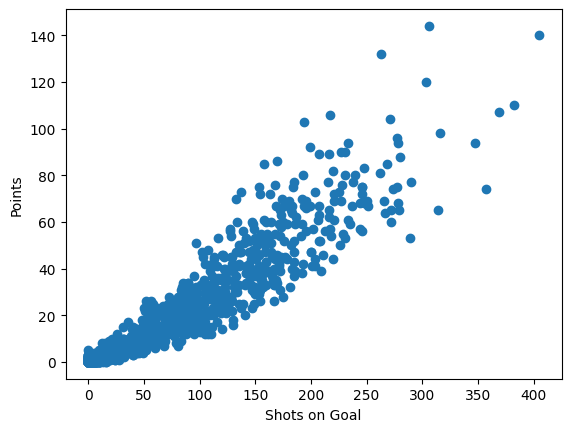

In [56]:
plt.plot(clean_df['SOG'], clean_df['PTS'], 'o')
plt.xlabel('Shots on Goal')
plt.ylabel('Points')

Text(0, 0.5, 'Penalty Minutes')

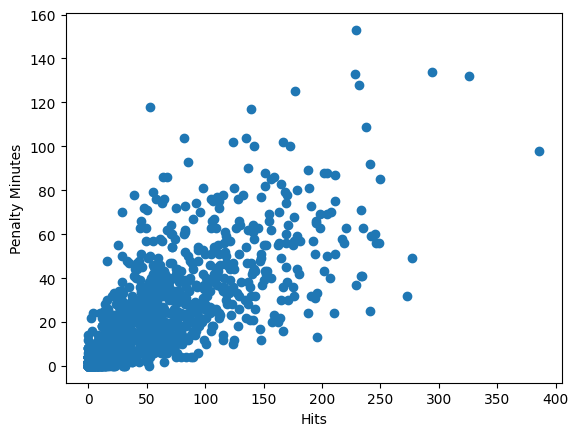

In [59]:
plt.scatter(clean_df['HIT'], clean_df['PIM'])
plt.xlabel('Hits')
plt.ylabel('Penalty Minutes')